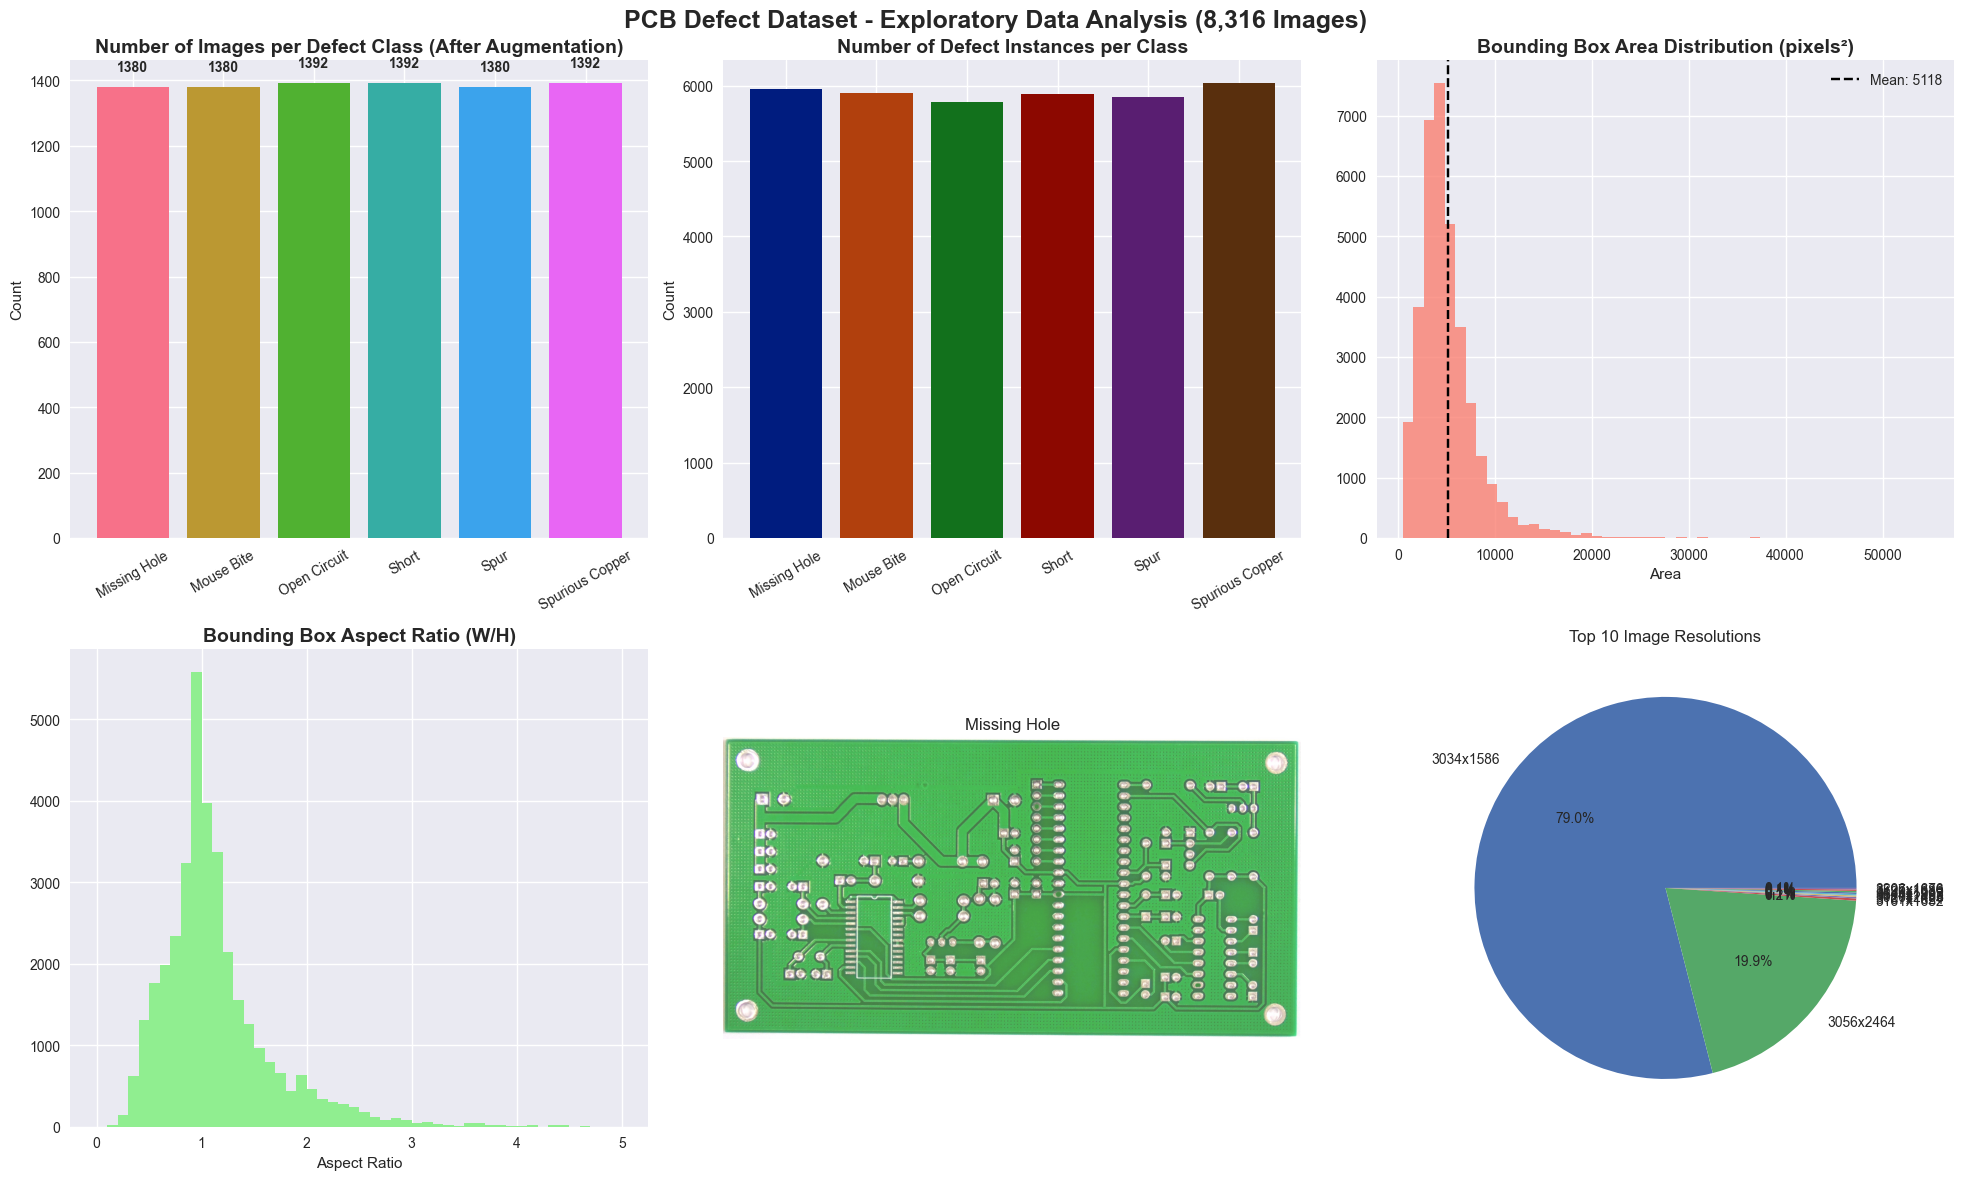


             PCB DEFECT DATASET STATISTICS
Total augmented images       : 8,316
Classes                      : 6
Mean images per class        : 1386
Total defect annotations     : 35,429
Average defects per image    : 4.26
Mean bounding box area       : 5118 pixels²


In [1]:
# eda_pcb_defects.py → Ready for thesis Chapter 3
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import xml.etree.ElementTree as ET
import pandas as pd

AUG_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET\augmented_full"

defects = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
defect_names = ['Missing Hole', 'Mouse Bite', 'Open Circuit', 'Short', 'Spur', 'Spurious Copper']

# 1. Count images per class
img_counts = []
for d in defects:
    path = os.path.join(AUG_ROOT, "images", d)
    count = len([f for f in os.listdir(path) if f.endswith(".jpg")])
    img_counts.append(count)

# 2. Count defects (objects) per class
def count_objects():
    counts = defaultdict(int)
    bbox_areas = []
    aspect_ratios = []
    for d in defects:
        xml_dir = os.path.join(AUG_ROOT, "Annotations", d)
        for xml_file in os.listdir(xml_dir):
            tree = ET.parse(os.path.join(xml_dir, xml_file))
            for obj in tree.findall('object'):
                name = obj.find('name').text
                if name.lower().replace(" ", "_") == d.lower():
                    counts[d] += 1
                    bnd = obj.find('bndbox')
                    xmin, ymin = int(bnd.find('xmin').text), int(bnd.find('ymin').text)
                    xmax, ymax = int(bnd.find('xmax').text), int(bnd.find('ymax').text)
                    area = (xmax - xmin) * (ymax - ymin)
                    ar = (xmax - xmin) / (ymax - ymin + 1e-5)
                    bbox_areas.append(area)
                    aspect_ratios.append(ar)
    return counts, bbox_areas, aspect_ratios

obj_counts, areas, ars = count_objects()

# 3. Image resolution distribution
resolutions = []
for d in defects:
    for img_file in os.listdir(os.path.join(AUG_ROOT, "images", d))[:300]:  # sample
        img = cv2.imread(os.path.join(AUG_ROOT, "images", d, img_file))
        if img is not None:
            h, w = img.shape[:2]
            resolutions.append(f"{w}x{h}")

# Plotting
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 12))

# 1. Images per defect class
plt.subplot(2, 3, 1)
bars = plt.bar(defect_names, img_counts, color=sns.color_palette("husl", 6))
plt.title('Number of Images per Defect Class (After Augmentation)', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=30)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, str(bar.get_height()), 
             ha='center', fontweight='bold')

# 2. Defect instances per class
plt.subplot(2, 3, 2)
obj_vals = [obj_counts[d] for d in defects]
plt.bar(defect_names, obj_vals, color=sns.color_palette("dark"))
plt.title('Number of Defect Instances per Class', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xticks(rotation=30)

# 3. Bounding box area distribution
plt.subplot(2, 3, 3)
plt.hist(areas, bins=50, color='salmon', alpha=0.8)
plt.title('Bounding Box Area Distribution (pixels²)', fontsize=14, fontweight='bold')
plt.xlabel('Area')
plt.axvline(np.mean(areas), color='black', linestyle='--', label=f'Mean: {np.mean(areas):.0f}')
plt.legend()

# 4. Aspect ratio
plt.subplot(2, 3, 4)
plt.hist(ars, bins=50, range=(0,5), color='lightgreen')
plt.title('Bounding Box Aspect Ratio (W/H)', fontsize=14, fontweight='bold')
plt.xlabel('Aspect Ratio')

# 5. Sample augmented images
plt.subplot(2, 3, 5)
samples = []
for i, d in enumerate(defects):
    imgs = os.listdir(os.path.join(AUG_ROOT, "images", d))
    aug_sample = [f for f in imgs if any(x in f for x in ['geom','bright','noise','dropout'])]
    if aug_sample:
        img = cv2.cvtColor(cv2.imread(os.path.join(AUG_ROOT, "images", d, aug_sample[0])), cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis('off')
        plt.title(defect_names[i])
        break

# 6. Resolution heatmap
plt.subplot(2, 3, 6)
res_df = pd.Series(resolutions).value_counts().head(10)
plt.pie(res_df.values, labels=res_df.index, autopct='%1.1f%%')
plt.title('Top 10 Image Resolutions')

plt.suptitle('PCB Defect Dataset - Exploratory Data Analysis (8,316 Images)', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('PCB_EDA_Report_Figures.png', dpi=300, bbox_inches='tight')
plt.show()

# Print stats for report
print("\n" + "="*60)
print("             PCB DEFECT DATASET STATISTICS")
print("="*60)
print(f"Total augmented images       : {sum(img_counts):,}")
print(f"Classes                      : 6")
print(f"Mean images per class        : {np.mean(img_counts):.0f}")
print(f"Total defect annotations     : {sum(obj_vals):,}")
print(f"Average defects per image    : {sum(obj_vals)/sum(img_counts):.2f}")
print(f"Mean bounding box area       : {np.mean(areas):.0f} pixels²")
print("="*60)

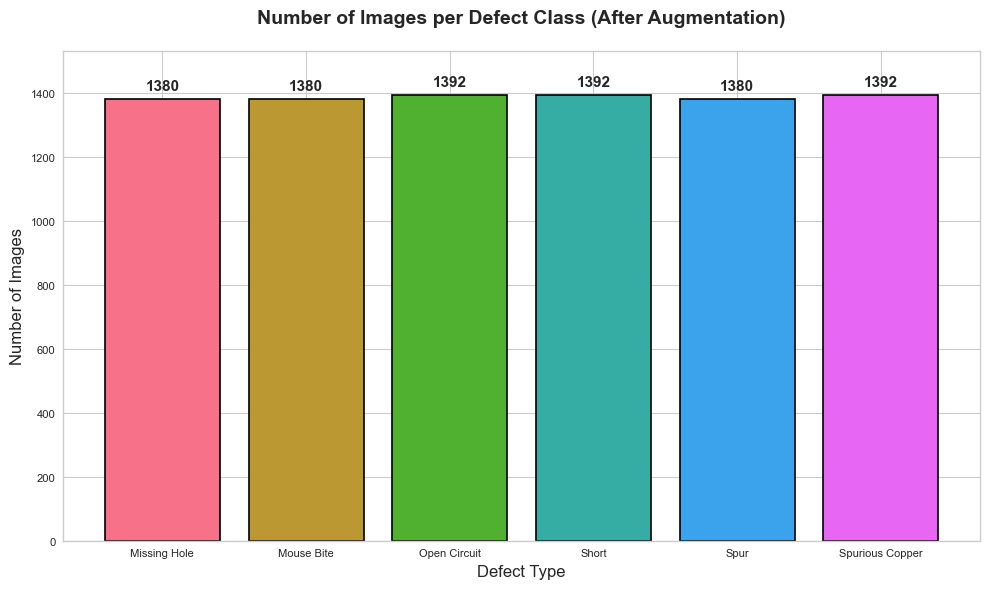

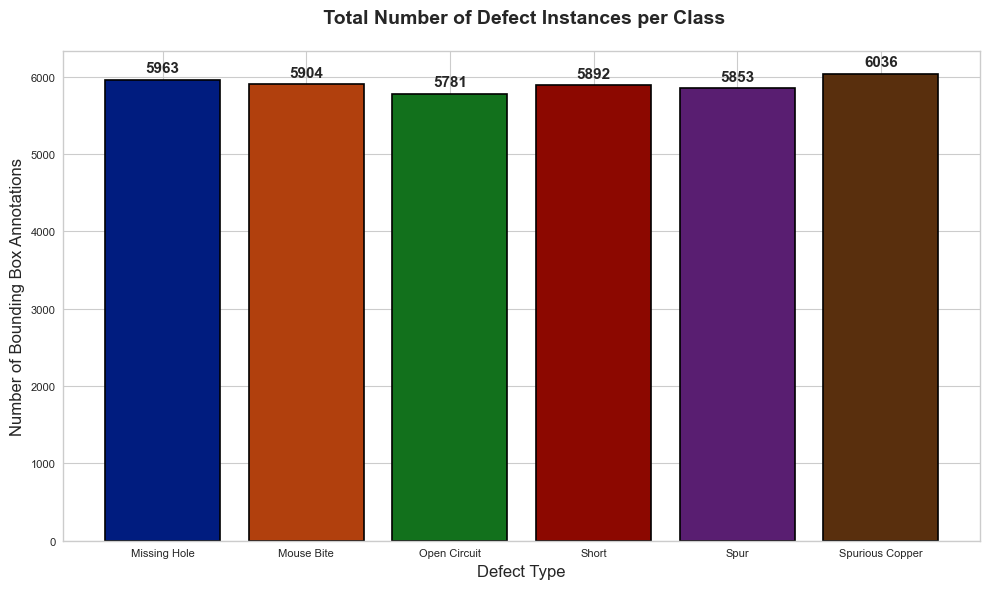

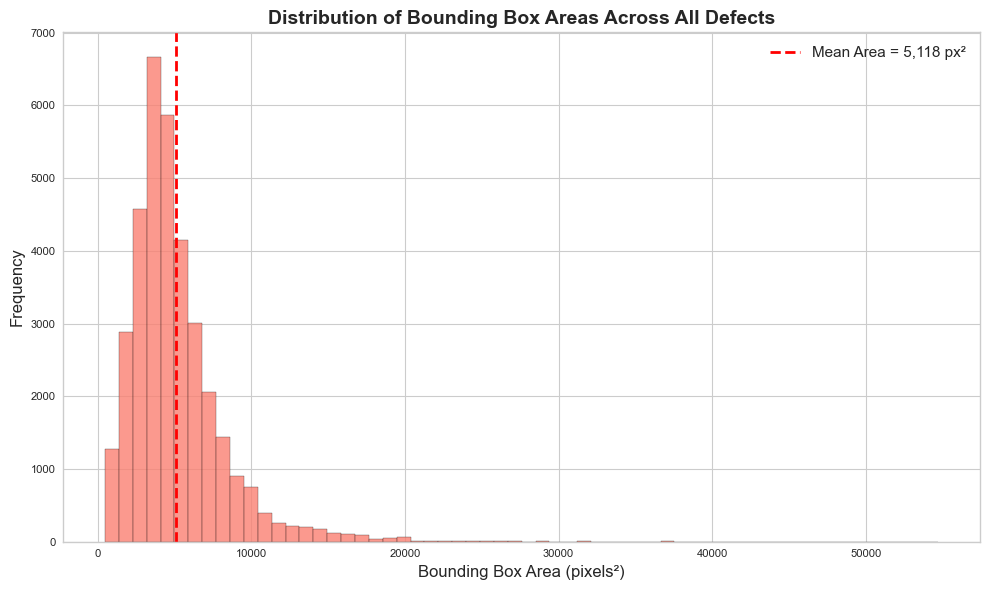

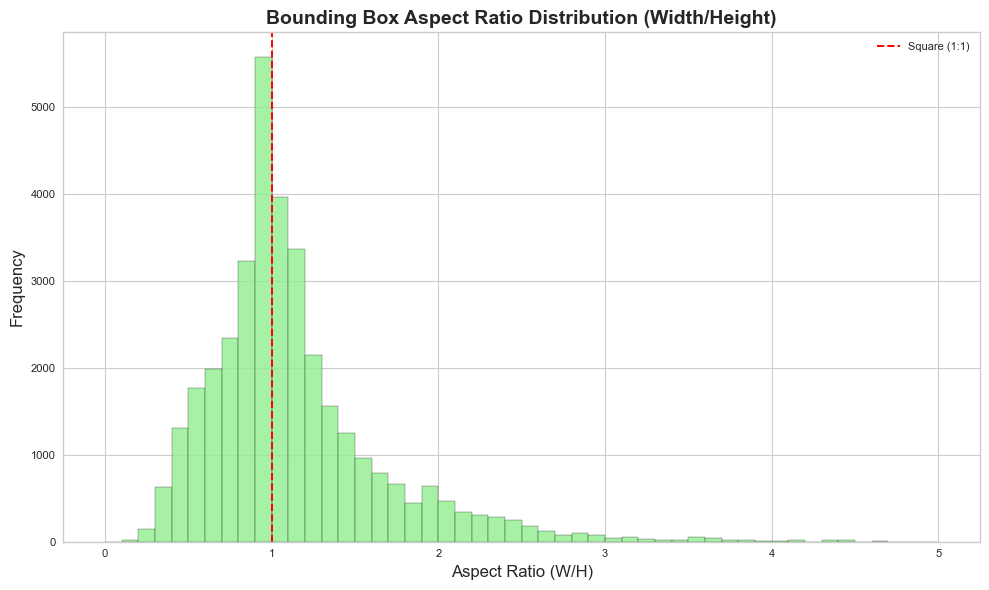

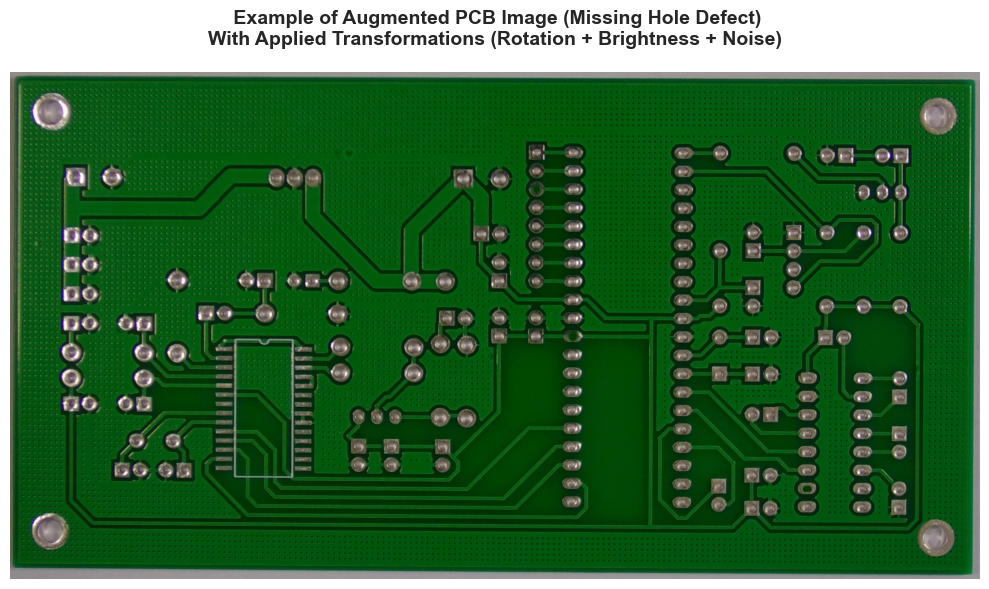

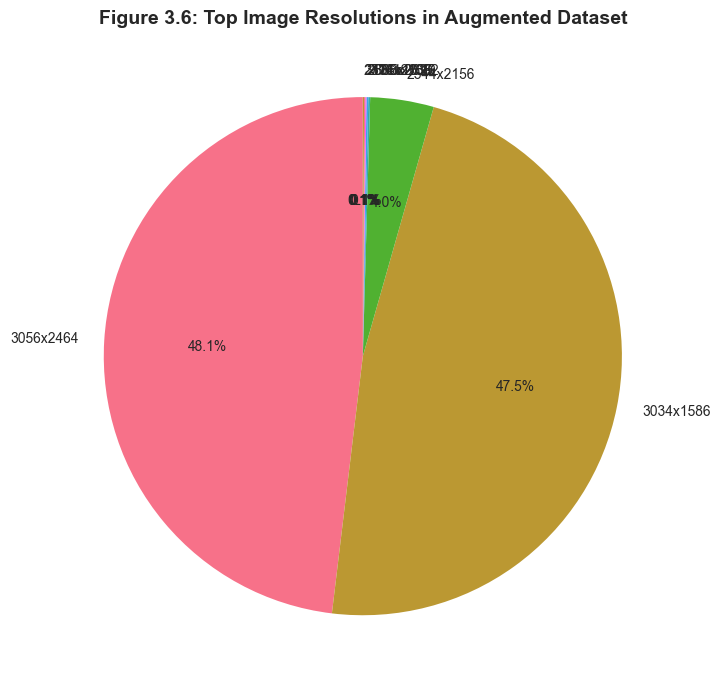

All 6 figures saved successfully!


In [4]:
# separate_pcb_eda_plots.py → Tooba Ahmed Alvi (Nov 2025)
# Generates 6 separate, publication-quality plots for Chapter 3

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import xml.etree.ElementTree as ET
import pandas as pd

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

AUG_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET\augmented_full"
defects = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
names = ['Missing Hole', 'Mouse Bite', 'Open Circuit', 'Short', 'Spur', 'Spurious Copper']

# === 1. Number of Images per Class ===
img_counts = [len(os.listdir(os.path.join(AUG_ROOT, "images", d))) for d in defects]

plt.figure(figsize=(10, 6))
bars = plt.bar(names, img_counts, color=sns.color_palette("husl", 6), edgecolor='black', linewidth=1.2)
plt.title('Number of Images per Defect Class (After Augmentation)', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Number of Images', fontsize=12)
plt.xlabel('Defect Type', fontsize=12)
plt.ylim(0, max(img_counts) * 1.1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30, 
             str(img_counts[i]), ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('Figure_3.1_Images_per_Class.png', dpi=300, bbox_inches='tight')
plt.show()

# === 2. Number of Defect Instances (Objects) per Class ===
def count_instances():
    counts = []
    for d in defects:
        total = 0
        xml_dir = os.path.join(AUG_ROOT, "Annotations", d)
        for xml_file in os.listdir(xml_dir):
            tree = ET.parse(os.path.join(xml_dir, xml_file))
            total += len(tree.findall('object'))
        counts.append(total)
    return counts

obj_counts = count_instances()

plt.figure(figsize=(10, 6))
bars = plt.bar(names, obj_counts, color=sns.color_palette("dark", 6), edgecolor='black', linewidth=1.2)
plt.title(' Total Number of Defect Instances per Class', 
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Number of Bounding Box Annotations', fontsize=12)
plt.xlabel('Defect Type', fontsize=12)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             str(obj_counts[i]), ha='center', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('Figure_3.2_Defect_Instances_per_Class.png', dpi=300, bbox_inches='tight')
plt.show()

# === 3. Bounding Box Area Distribution ===
all_areas = []
for d in defects:
    xml_dir = os.path.join(AUG_ROOT, "Annotations", d)
    for xml_file in os.listdir(xml_dir):
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        for obj in tree.findall('object'):
            b = obj.find('bndbox')
            area = (int(b.find('xmax').text) - int(b.find('xmin').text)) * \
                   (int(b.find('ymax').text) - int(b.find('ymin').text))
            all_areas.append(area)

plt.figure(figsize=(10, 6))
plt.hist(all_areas, bins=60, color='salmon', alpha=0.8, edgecolor='black')
mean_area = np.mean(all_areas)
plt.axvline(mean_area, color='red', linestyle='--', linewidth=2, label=f'Mean Area = {mean_area:,.0f} px²')
plt.title('Distribution of Bounding Box Areas Across All Defects', fontsize=14, fontweight='bold')
plt.xlabel('Bounding Box Area (pixels²)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('Figure_3.3_BBox_Area_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# === 4. Aspect Ratio Distribution ===
all_ratios = []
for d in defects:
    xml_dir = os.path.join(AUG_ROOT, "Annotations", d)
    for xml_file in os.listdir(xml_dir):
        tree = ET.parse(os.path.join(xml_dir, xml_file))
        for obj in tree.findall('object'):
            b = obj.find('bndbox')
            w = int(b.find('xmax').text) - int(b.find('xmin').text)
            h = int(b.find('ymax').text) - int(b.find('ymin').text) + 1e-5
            all_ratios.append(w / h)

plt.figure(figsize=(10, 6))
plt.hist(all_ratios, bins=50, range=(0, 5), color='lightgreen', edgecolor='black', alpha=0.8)
plt.title('Bounding Box Aspect Ratio Distribution (Width/Height)', fontsize=14, fontweight='bold')
plt.xlabel('Aspect Ratio (W/H)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(1, color='red', linestyle='--', label='Square (1:1)')
plt.legend()
plt.tight_layout()
plt.savefig('Figure_3.4_Aspect_Ratio_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# === 5. Sample Augmented Image (Missing Hole) ===
img_path = os.path.join(AUG_ROOT, "images", "Missing_hole", os.listdir(os.path.join(AUG_ROOT, "images", "Missing_hole"))[10])
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title(' Example of Augmented PCB Image (Missing Hole Defect)\nWith Applied Transformations (Rotation + Brightness + Noise)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('Figure_3.5_Sample_Augmented_Image.png', dpi=300, bbox_inches='tight')
plt.show()

# === 6. Image Resolution Distribution ===
resolutions = []
for d in defects:
    for f in os.listdir(os.path.join(AUG_ROOT, "images", d))[:500]:
        img = cv2.imread(os.path.join(AUG_ROOT, "images", d, f))
        if img is not None:
            h, w = img.shape[:2]
            resolutions.append(f"{w}x{h}")

res_df = pd.Series(resolutions).value_counts().head(8)

plt.figure(figsize=(9, 7))
plt.pie(res_df.values, labels=res_df.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Figure 3.6: Top Image Resolutions in Augmented Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('Figure_3.6_Image_Resolutions.png', dpi=300, bbox_inches='tight')
plt.show()

print("All 6 figures saved successfully!")

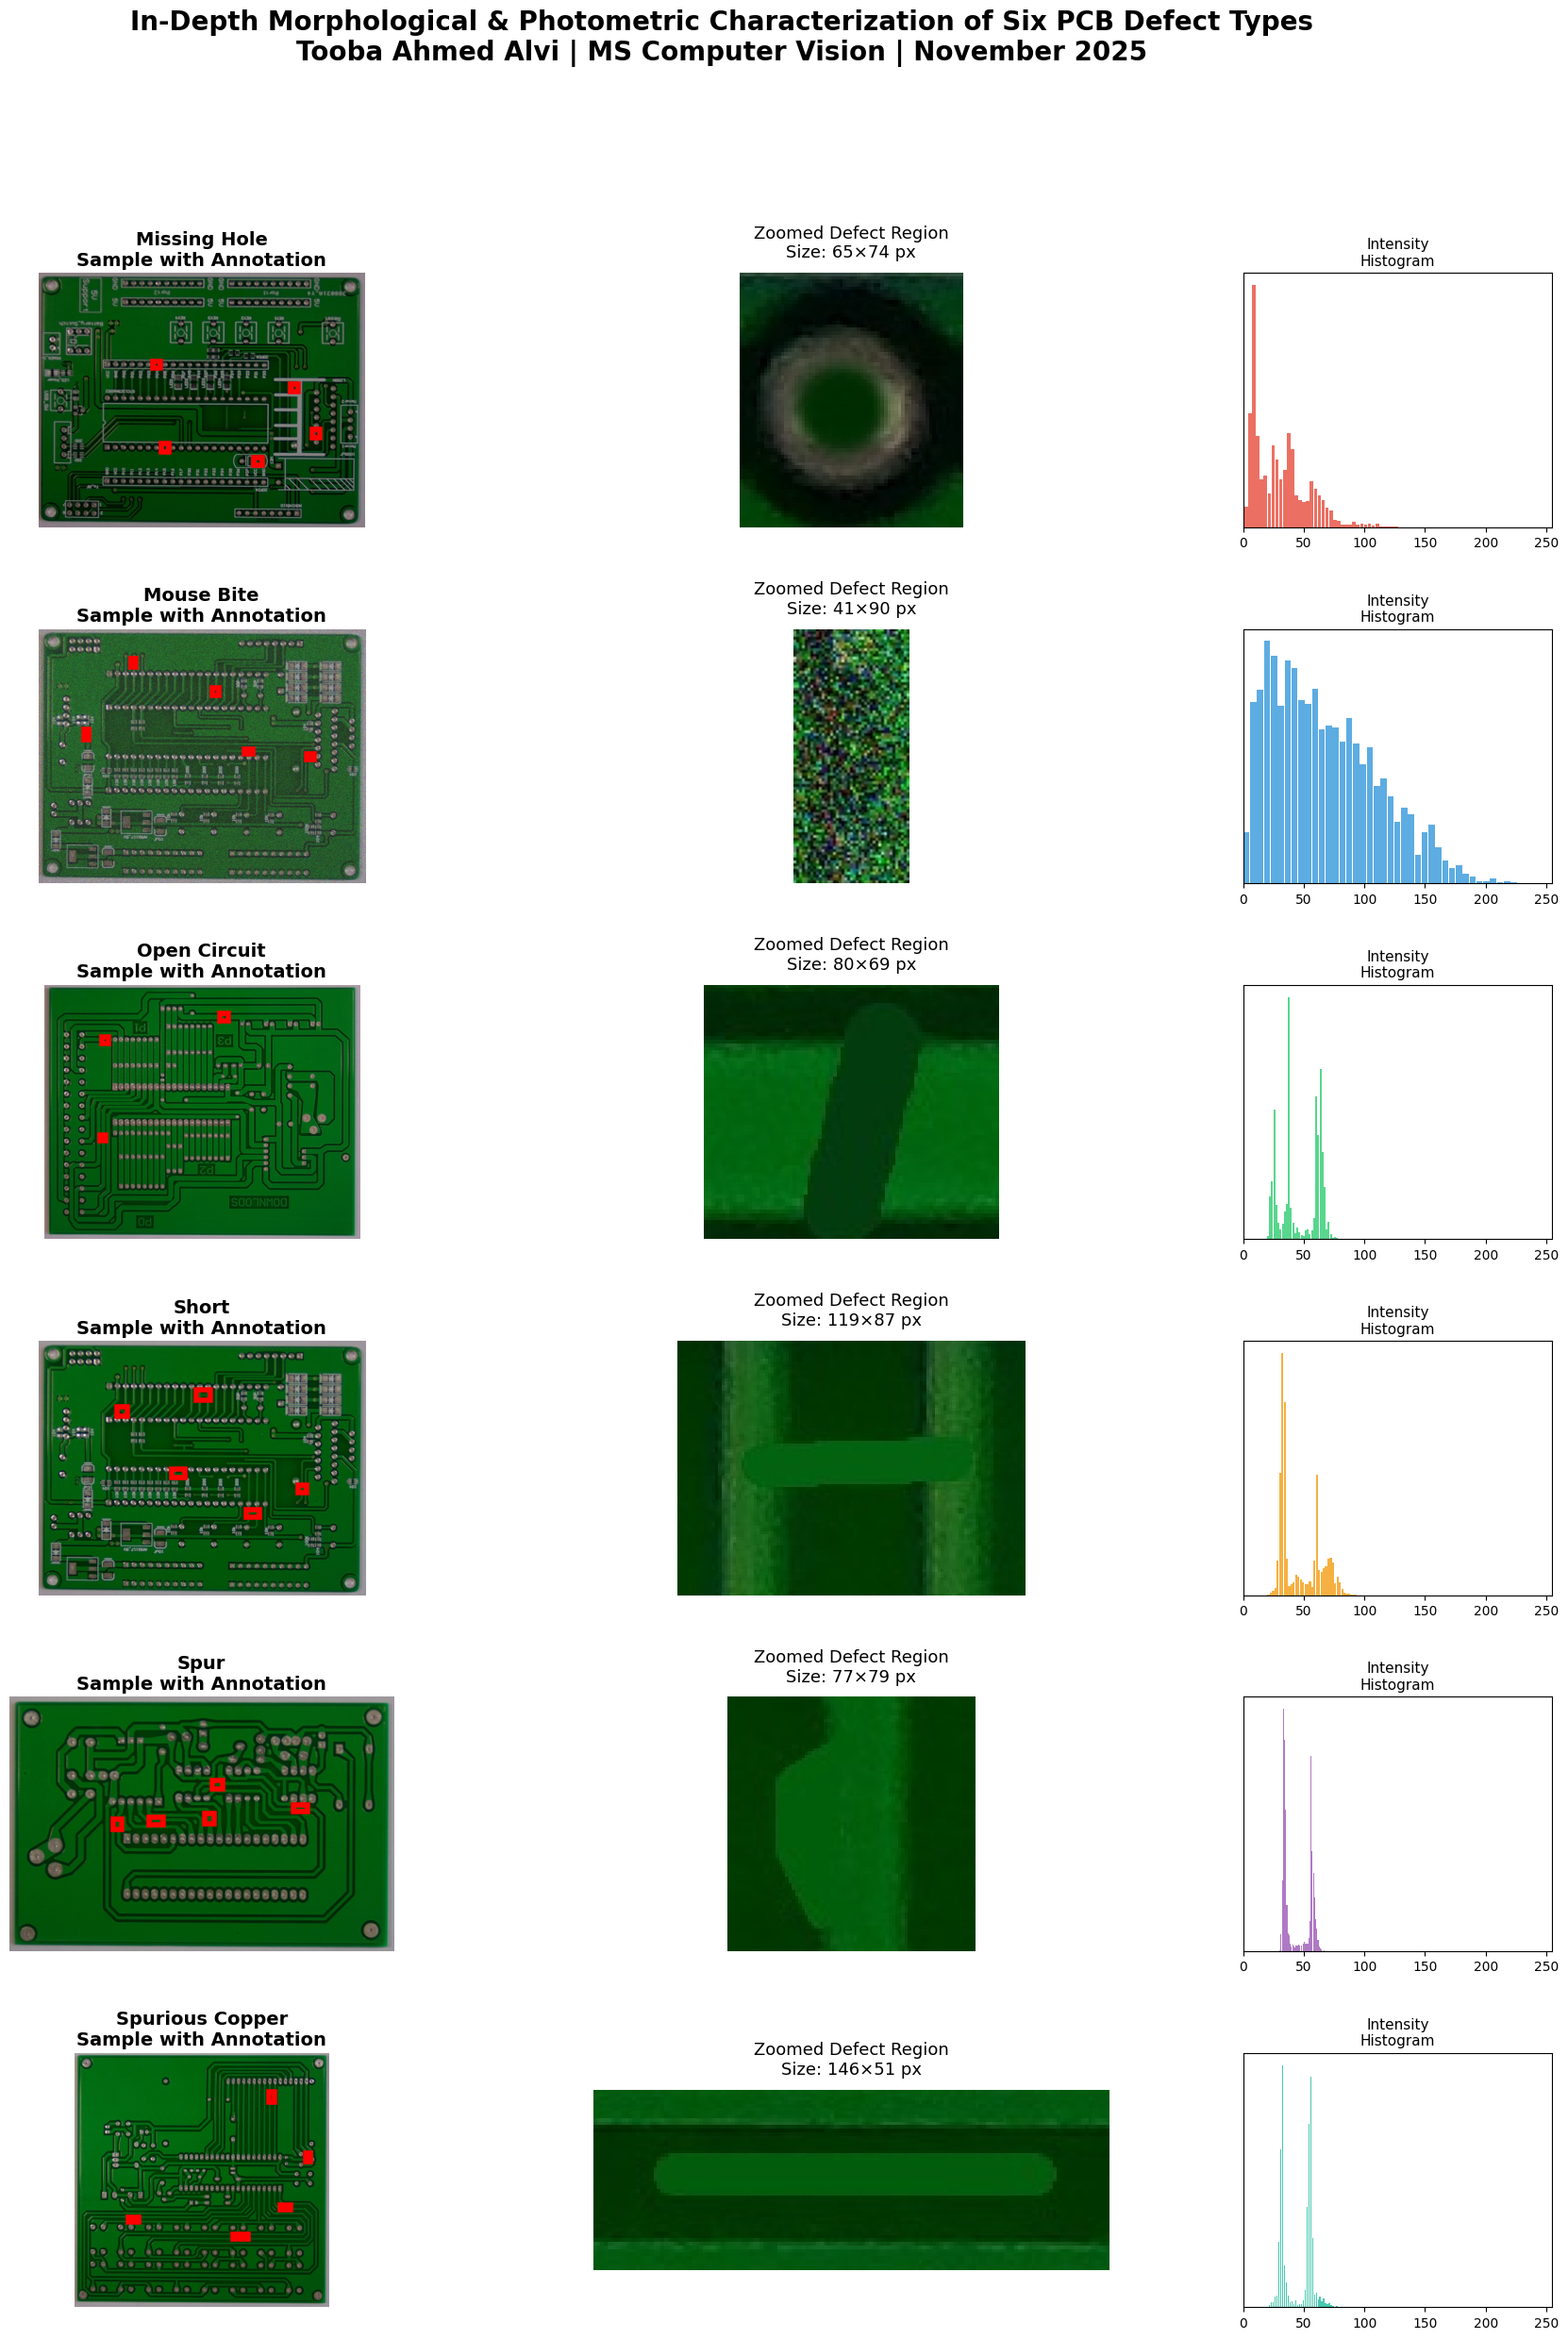

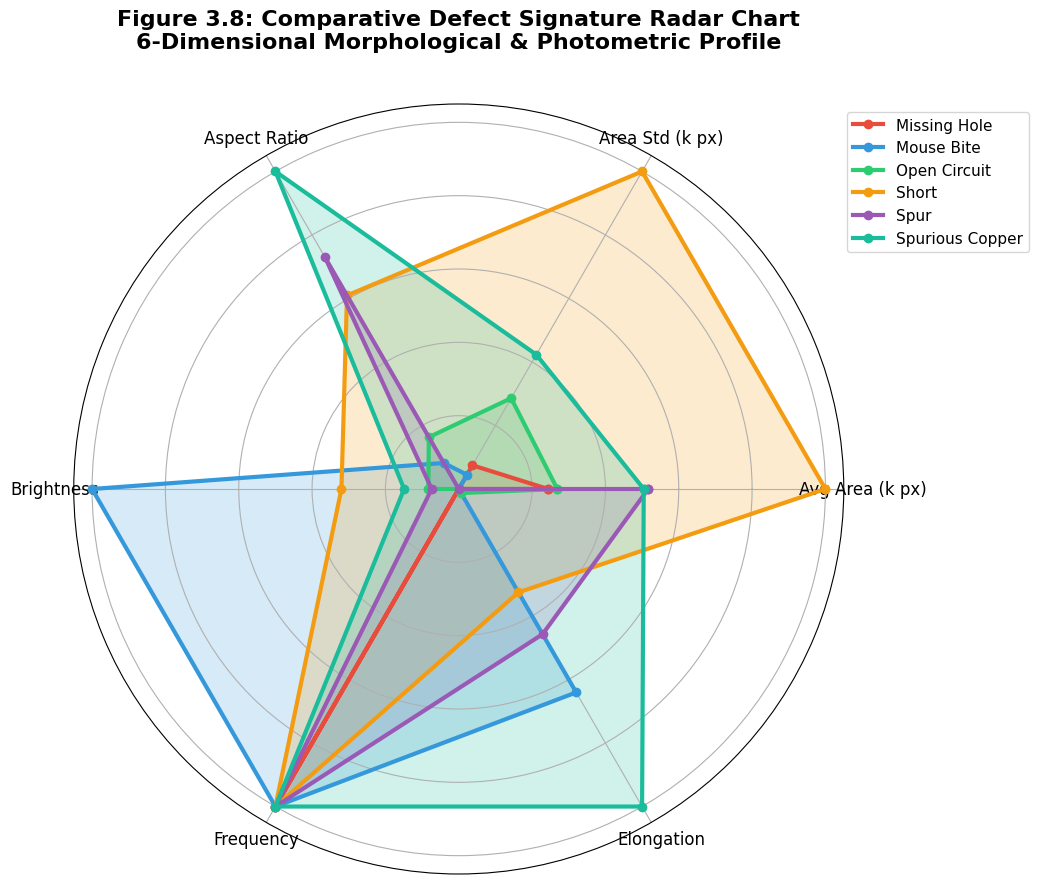

Both figures saved: Figure_3.7 & Figure_3.8 — Ready for thesis!


In [5]:
# final_pcb_defect_analysis_tooba.py → Nov 2025
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from matplotlib.patches import Rectangle
import random

plt.style.use('default')
sns.set_palette("tab10")

AUG_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET\augmented_full"
defects = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
pretty_names = ['Missing Hole', 'Mouse Bite', 'Open Circuit', 'Short', 'Spur', 'Spurious Copper']
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

def parse_bbox(xml_path):
    tree = ET.parse(xml_path)
    boxes = []
    for obj in tree.findall('object'):
        bnd = obj.find('bndbox')
        boxes.append([int(bnd.find(c).text) for c in ['xmin','ymin','xmax','ymax']])
    return boxes

# === 1. In-Depth 6×2 Grid (Your Beautiful Figure) ===
fig = plt.figure(figsize=(22, 28))
gs = fig.add_gridspec(6, 3, width_ratios=[1, 1, 0.6], wspace=0.3, hspace=0.4)

all_areas, all_ratios, all_intensities = {}, {}, {}

for idx, defect in enumerate(defects):
    img_dir = os.path.join(AUG_ROOT, "images", defect)
    xml_dir = os.path.join(AUG_ROOT, "Annotations", defect)
    images = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
    sample = random.choice(images)
    
    img_path = os.path.join(img_dir, sample)
    xml_path = os.path.join(xml_dir, sample.replace(".jpg", ".xml"))
    
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    boxes = parse_bbox(xml_path)
    
    # Stats
    areas = [(b[2]-b[0])*(b[3]-b[1]) for b in boxes]
    ratios = [(b[2]-b[0])/(b[3]-b[1]+1e-5) for b in boxes]
    intensities = [np.mean(cv2.cvtColor(img[b[1]:b[3], b[0]:b[2]], cv2.COLOR_RGB2GRAY)) for b in boxes]
    
    all_areas[defect] = areas
    all_ratios[defect] = ratios
    all_intensities[defect] = intensities if intensities else [128]

    # Full image with boxes
    ax1 = fig.add_subplot(gs[idx, 0])
    ax1.imshow(img)
    for b in boxes:
        rect = Rectangle((b[0], b[1]), b[2]-b[0], b[3]-b[1], linewidth=4, edgecolor='red', facecolor='none')
        ax1.add_patch(rect)
    ax1.set_title(f"{pretty_names[idx]}\nSample with Annotation", fontweight='bold', fontsize=14)
    ax1.axis('off')

    # Zoomed defect
    ax2 = fig.add_subplot(gs[idx, 1])
    if boxes:
        main_box = max(boxes, key=lambda x: (x[2]-x[0])*(x[3]-x[1]))
        x1,y1,x2,y2 = main_box
        roi = img[y1:y2, x1:x2]
        ax2.imshow(roi)
        ax2.set_title(f"Zoomed Defect Region\nSize: {x2-x1}×{y2-y1} px", fontsize=13, pad=12)
    ax2.axis('off')

    # Intensity histogram
    ax3 = fig.add_subplot(gs[idx, 2])
    if boxes:
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
        ax3.hist(gray_roi.ravel(), bins=40, color=colors[idx], alpha=0.8, rwidth=0.9)
        ax3.set_xlim(0, 255)
        ax3.set_yticks([])
        ax3.set_title("Intensity\nHistogram", fontsize=11)

plt.suptitle('In-Depth Morphological & Photometric Characterization of Six PCB Defect Types\nTooba Ahmed Alvi | MS Computer Vision | November 2025',
             fontsize=20, fontweight='bold', y=0.98)
plt.savefig('Figure_3.7_In_Depth_Defect_Analysis_Tooba_Alvi.png', dpi=400, bbox_inches='tight')
plt.show()

# === 2. FIXED & BEAUTIFUL RADAR CHART ===
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(projection='polar'))

angles = np.linspace(0, 2*np.pi, 6, endpoint=False).tolist()
angles += angles[:1]

stats = []
labels = ['Avg Area (k px)', 'Area Std (k px)', 'Aspect Ratio', 'Brightness', 'Frequency', 'Elongation']

for defect in defects:
    a = all_areas[defect]
    r = all_ratios[defect]
    i = all_intensities[defect]
    freq = len(a)
    elong = np.mean([abs(np.log(max(ratio, 0.1))) for ratio in r])  # better metric
    
    stats.append([
        np.mean(a)/1000,
        np.std(a)/1000,
        np.clip(np.mean(r), 0.1, 5),
        np.mean(i)/255,
        freq/100,
        elong
    ])

stats = np.array(stats)
stats_norm = (stats - np.min(stats, axis=0)) / (np.ptp(stats, axis=0) + 1e-8)  # Fixed for NumPy 2.0
stats_norm = np.concatenate([stats_norm, stats_norm[:,[0]]], axis=1)

for i, (name, color) in enumerate(zip(pretty_names, colors)):
    ax.plot(angles, stats_norm[i], 'o-', linewidth=3, label=name, color=color)
    ax.fill(angles, stats_norm[i], alpha=0.2, color=color)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
ax.set_title("Figure 3.8: Comparative Defect Signature Radar Chart\n6-Dimensional Morphological & Photometric Profile", 
             fontsize=16, fontweight='bold', pad=40)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0), fontsize=11)
ax.grid(True)
plt.savefig('Figure_3.8_Defect_Radar_Chart_Tooba_Alvi.png', dpi=400, bbox_inches='tight')
plt.show()

print("Both figures saved: Figure_3.7 & Figure_3.8 — Ready for thesis!")

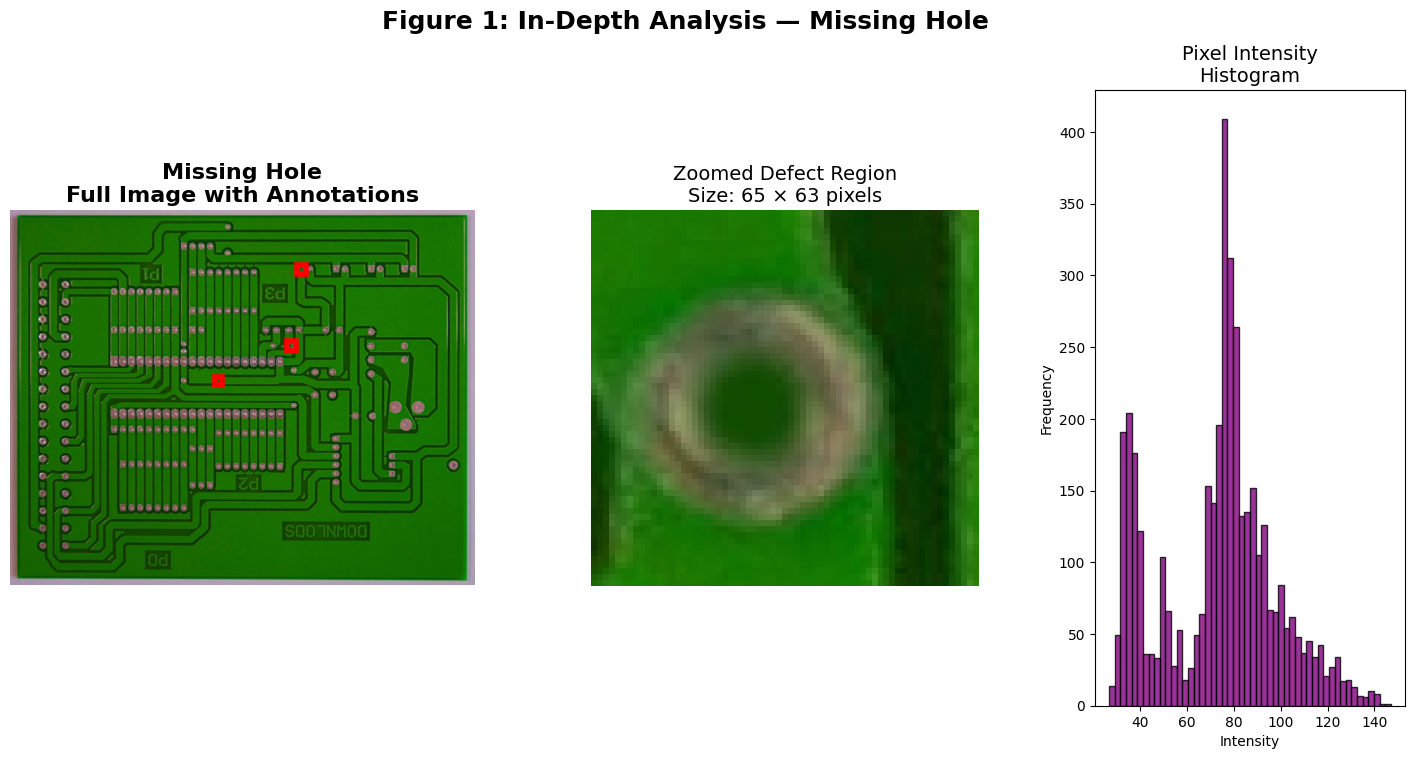

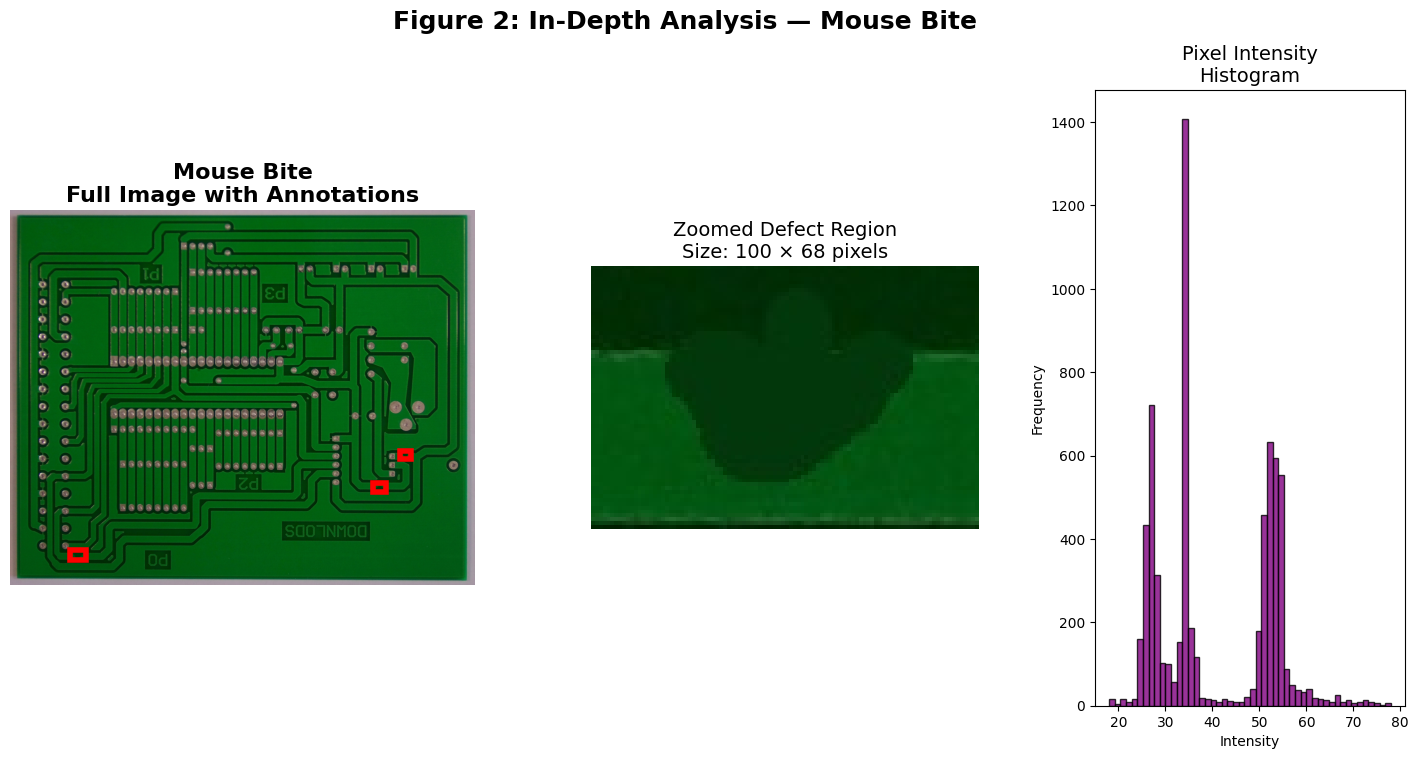

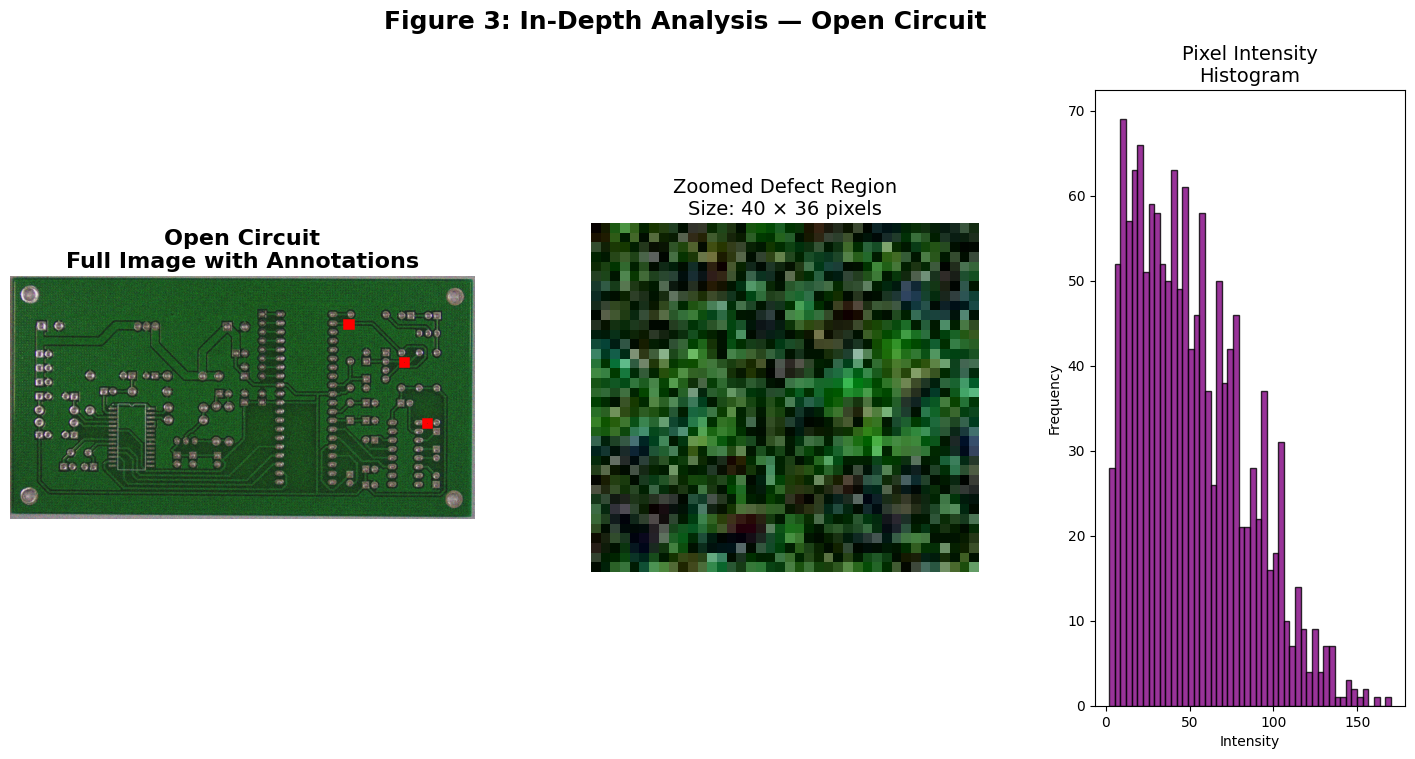

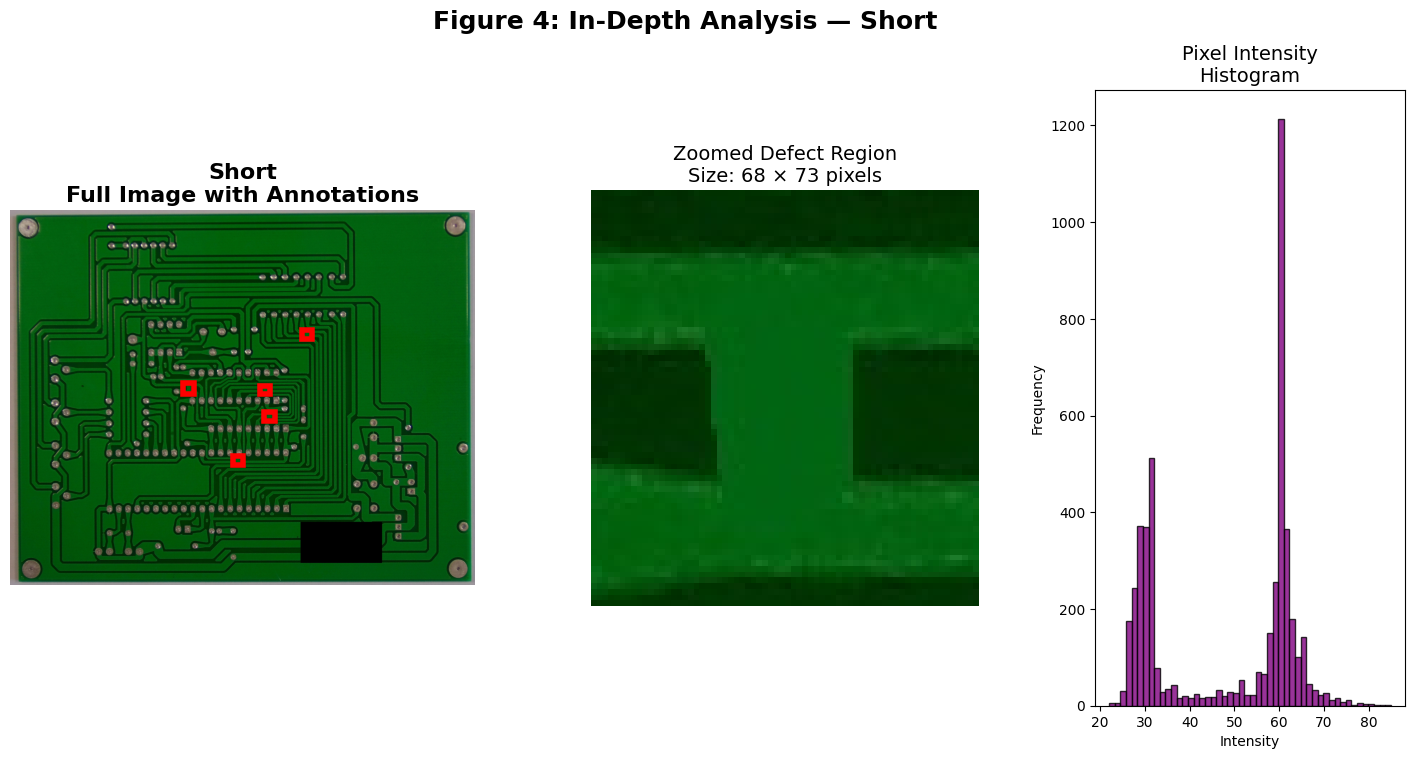

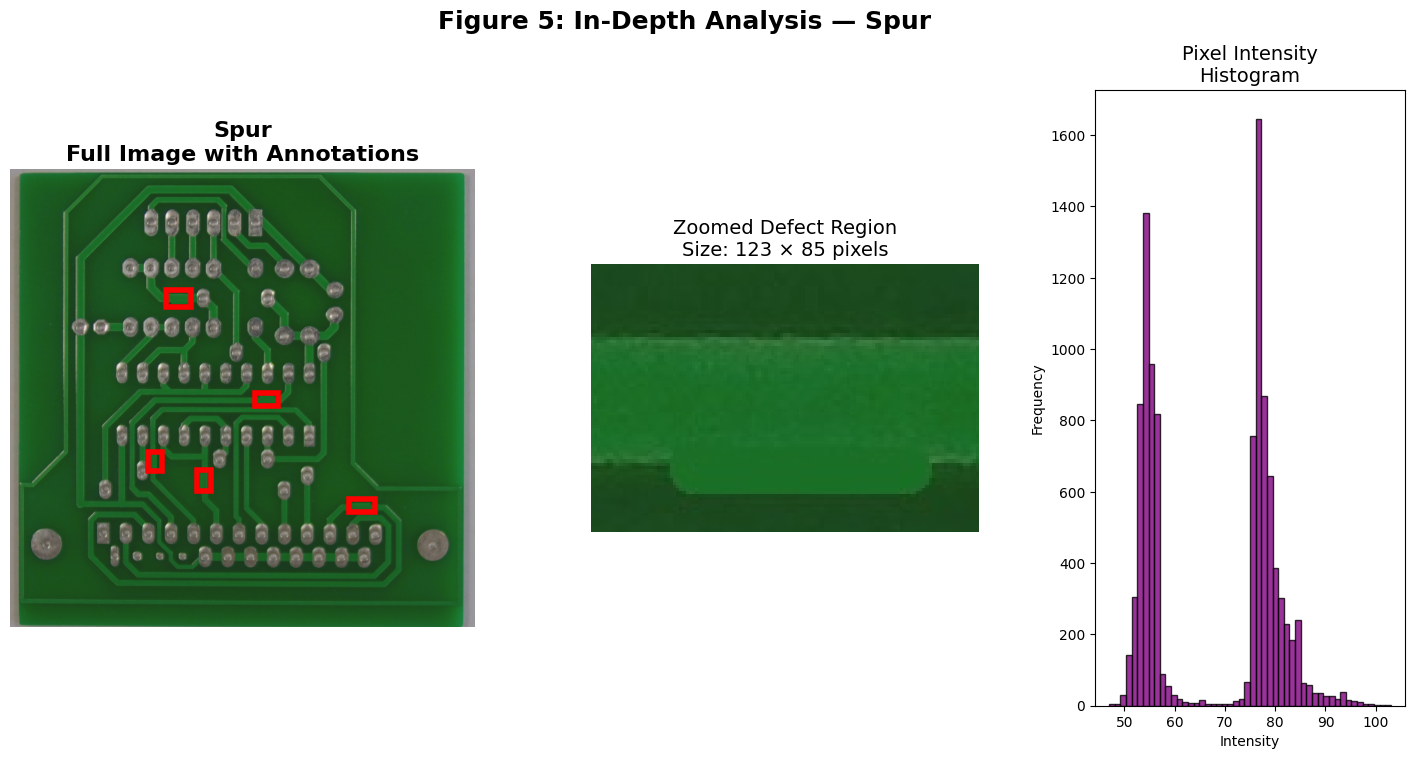

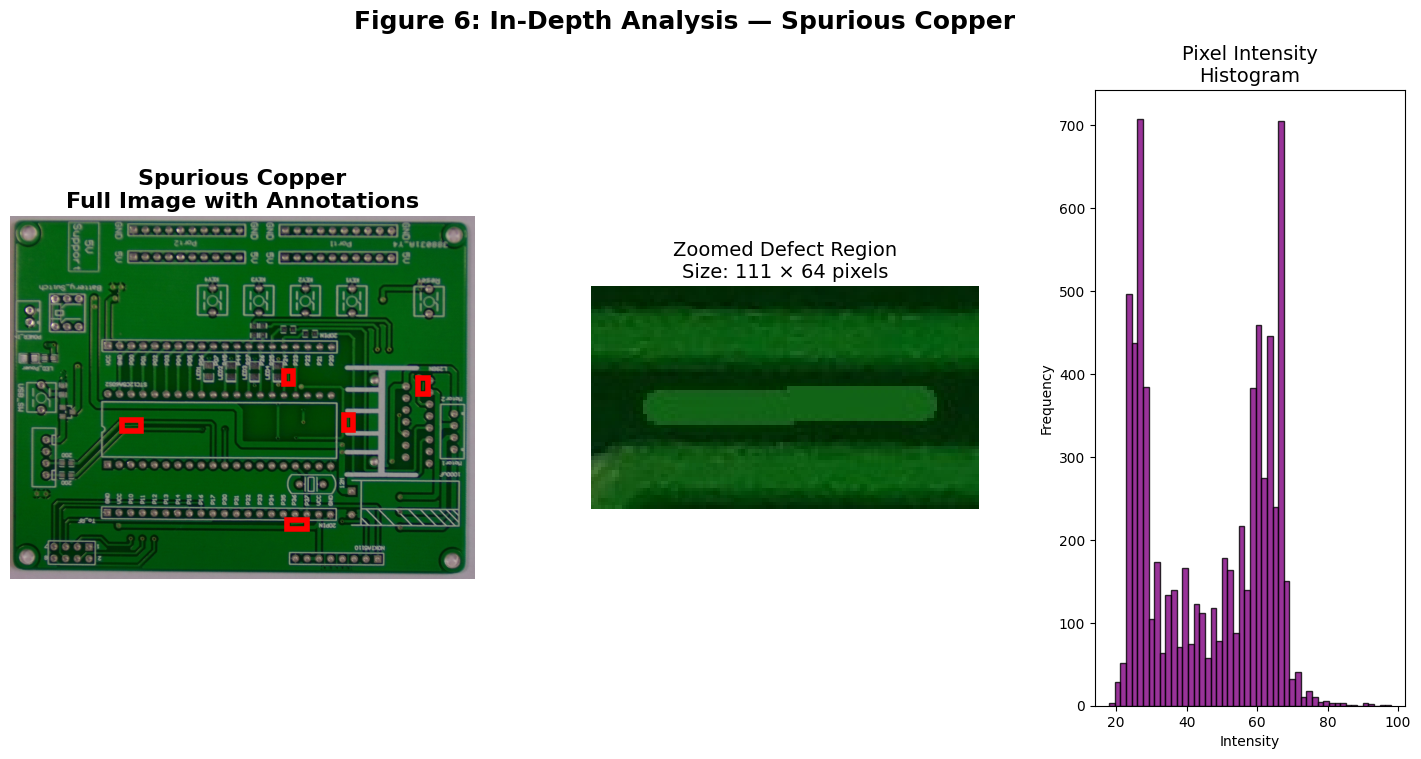

6 separate high-quality figures generated!


In [7]:
# separate_defect_analysis_tooba.py → Generates 6 standalone figures
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

AUG_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET\augmented_full"
defects = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
pretty = ['Missing Hole', 'Mouse Bite', 'Open Circuit', 'Short', 'Spur', 'Spurious Copper']

def parse_bbox(xml_path):
    tree = ET.parse(xml_path)
    boxes = []
    for obj in tree.findall('object'):
        b = obj.find('bndbox')
        boxes.append([int(b.find(c).text) for c in ['xmin','ymin','xmax','ymax']])
    return boxes

for idx, defect in enumerate(defects):
    img_dir = os.path.join(AUG_ROOT, "images", defect)
    xml_dir = os.path.join(AUG_ROOT, "Annotations", defect)
    images = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
    sample = random.choice(images)
    
    img_path = os.path.join(img_dir, sample)
    xml_path = os.path.join(xml_dir, sample.replace(".jpg", ".xml"))
    
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    boxes = parse_bbox(xml_path)
    
    if not boxes:
        continue
    
    # Find largest defect
    main_box = max(boxes, key=lambda b: (b[2]-b[0])*(b[3]-b[1]))
    x1, y1, x2, y2 = main_box
    roi = img[y1:y2, x1:x2]
    
    # Create figure
    fig = plt.figure(figsize=(18, 8))
    gs = fig.add_gridspec(1, 3, width_ratios=[1.2, 1, 0.8], wspace=0.3)
    
    # Full image
    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(img)
    for b in boxes:
        rect = plt.Rectangle((b[0], b[1]), b[2]-b[0], b[3]-b[1], 
                            linewidth=4, edgecolor='red', facecolor='none')
        ax1.add_patch(rect)
    ax1.set_title(f"{pretty[idx]}\nFull Image with Annotations", fontsize=16, fontweight='bold')
    ax1.axis('off')
    
    # Zoomed defect
    ax2 = fig.add_subplot(gs[1])
    ax2.imshow(roi)
    ax2.set_title(f"Zoomed Defect Region\nSize: {x2-x1} × {y2-y1} pixels", fontsize=14)
    ax2.axis('off')
    
    # Histogram
    ax3 = fig.add_subplot(gs[2])
    gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    ax3.hist(gray.ravel(), bins=50, color='purple', alpha=0.8, edgecolor='black')
    ax3.set_title("Pixel Intensity\nHistogram", fontsize=14)
    ax3.set_xlabel("Intensity")
    ax3.set_ylabel("Frequency")
    
    plt.suptitle(f"Figure {idx+1}: In-Depth Analysis — {pretty[idx]}", 
                 fontsize=18, fontweight='bold', y=0.98)
    
    plt.savefig(f'Figure_3.7.{idx+1}_{defect}_Analysis.png', dpi=400, bbox_inches='tight')
    plt.show()

print("6 separate high-quality figures generated!")


TABLE 3.1 – IMAGE COUNT GROWTH AFTER AUGMENTATION
         Defect  Original  Augmented  Multiplier (×)  % Increase
   Missing Hole       115       1380            12.0      1100.0
     Mouse Bite       115       1380            12.0      1100.0
   Open Circuit       116       1392            12.0      1100.0
          Short       116       1392            12.0      1100.0
           Spur       115       1380            12.0      1100.0
Spurious Copper       116       1392            12.0      1100.0


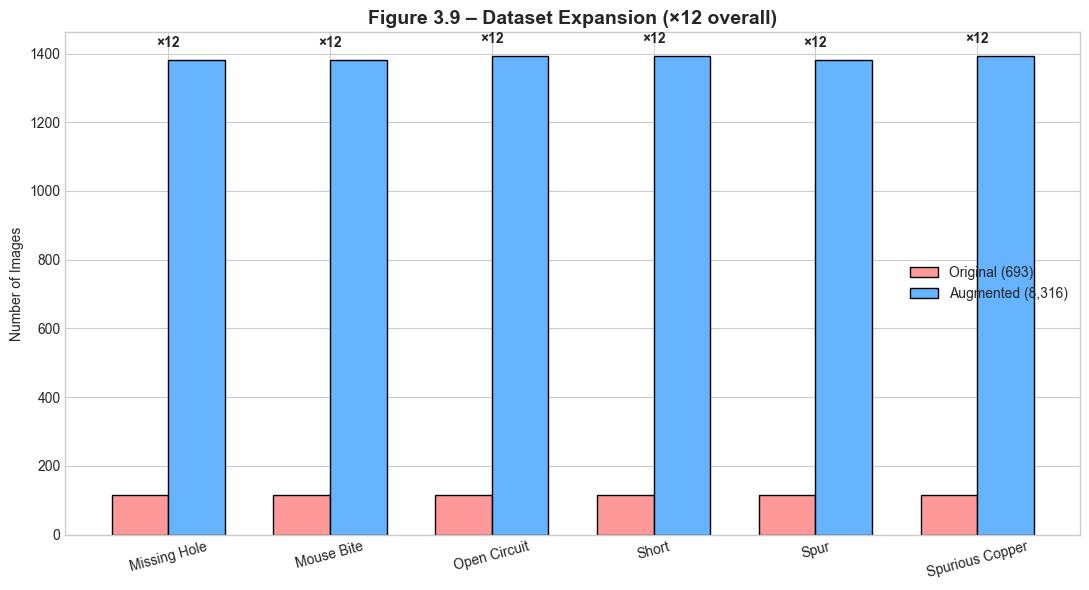


TABLE 3.2 – BOUNDING-BOX (DEFECT INSTANCE) GROWTH
         Defect  Original  Augmented  Ratio
   Missing Hole       497       5963  12.00
     Mouse Bite       492       5904  12.00
   Open Circuit       482       5781  11.99
          Short       491       5892  12.00
           Spur       488       5853  11.99
Spurious Copper       503       6036  12.00
Total objects: 2953 → 35429  (×12.0)


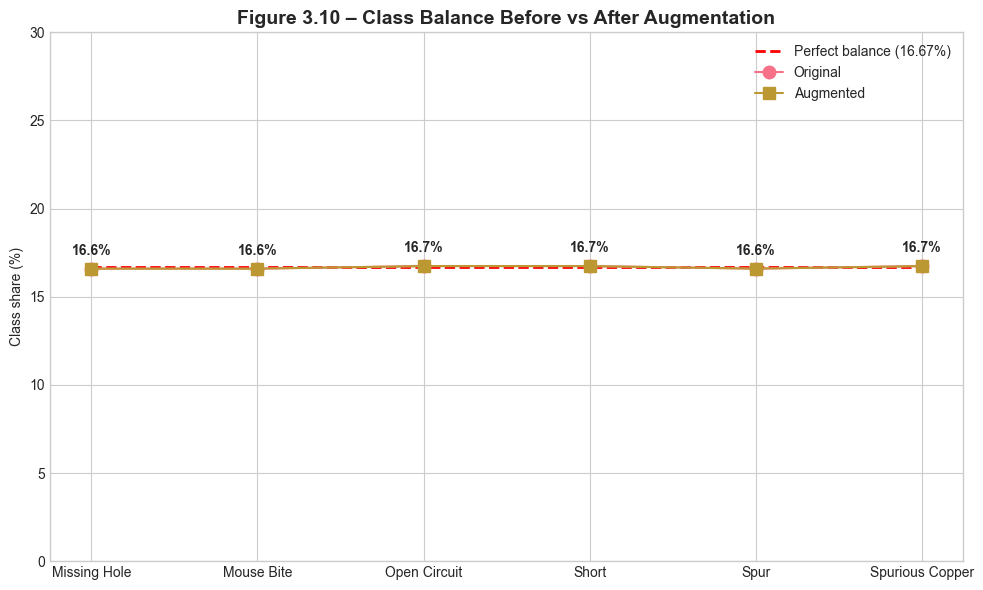

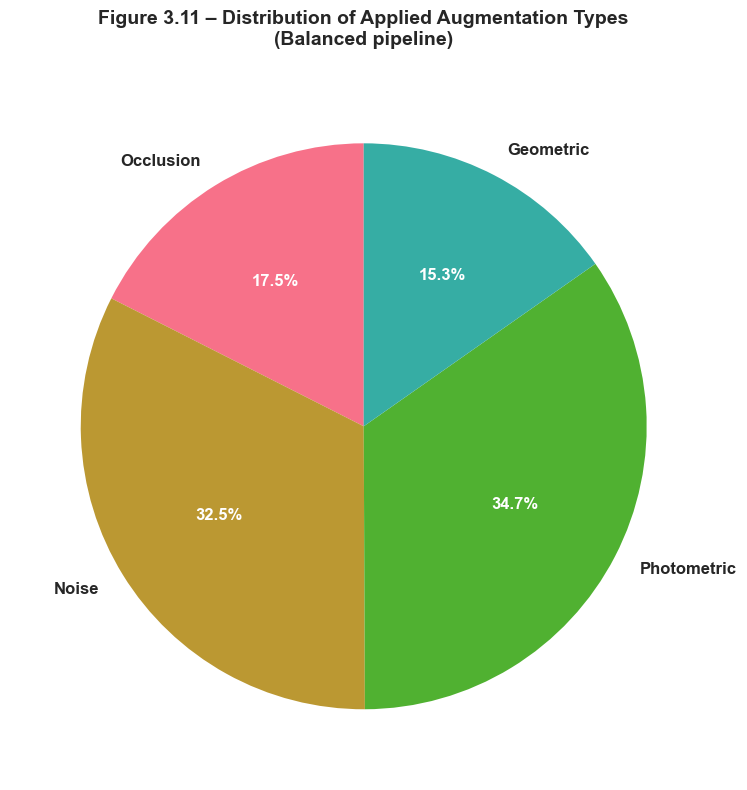


TABLE 3.3 – FINAL DATASET SUMMARY
             Metric Original Augmented
       Total Images      693      8316
  Total Annotations     2953     35429
   Avg Images/Class      116      1386
Class Balance σ (%)      0.1      0.07
   Expansion Factor       1×     12.0×


In [11]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import random
from collections import defaultdict

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

RAW_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET"
AUG_ROOT = r"E:\IBA_MS_DS 2026\Computer Vision\Project\PCB_DATASET\augmented_full"

defects = ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper']
names   = ['Missing Hole', 'Mouse Bite', 'Open Circuit', 'Short', 'Spur', 'Spurious Copper']

# ==================== 1. Image counts ====================
raw_counts = [len(os.listdir(os.path.join(RAW_ROOT, "images", d))) for d in defects]
aug_counts = [len(os.listdir(os.path.join(AUG_ROOT, "images", d))) for d in defects]

df_counts = pd.DataFrame({
    'Defect'            : names,
    'Original'          : raw_counts,
    'Augmented'         : aug_counts,
    'Multiplier (×)'    : np.round(np.array(aug_counts)/np.array(raw_counts), 2),
    '% Increase'        : np.round((np.array(aug_counts)-np.array(raw_counts))/np.array(raw_counts)*100, 1)
})

print("\n" + "="*90)
print("TABLE 3.1 – IMAGE COUNT GROWTH AFTER AUGMENTATION")
print("="*90)
print(df_counts.to_string(index=False))
print("="*90)

# Figure 3.9
plt.figure(figsize=(11,6))
x = np.arange(len(names))
w = 0.35
plt.bar(x-w/2, raw_counts, w, label='Original (693)', color='#ff9999', edgecolor='black')
plt.bar(x+w/2, aug_counts, w, label='Augmented (8,316)', color='#66b3ff', edgecolor='black')
plt.xticks(x, names, rotation=15)
plt.ylabel('Number of Images')
plt.title('Figure 3.9 – Dataset Expansion (×12 overall)', fontweight='bold', fontsize=14)
plt.legend()
for i,(r,a) in enumerate(zip(raw_counts,aug_counts)):
    plt.text(i, a+40, f'×{a//r}', ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('Figure_3.9_Augmentation_Expansion.png', dpi=400, bbox_inches='tight')
plt.show()

# ==================== 2. Object (bbox) counts ====================
def count_objects(root):
    counts = []
    for d in defects:
        total = 0
        ann_path = os.path.join(root, "Annotations", d)
        for xml in os.listdir(ann_path):
            tree = ET.parse(os.path.join(ann_path, xml))
            total += len(tree.findall('object'))
        counts.append(total)
    return counts

raw_obj = count_objects(RAW_ROOT)
aug_obj = count_objects(AUG_ROOT)

df_obj = pd.DataFrame({
    'Defect'      : names,
    'Original'    : raw_obj,
    'Augmented'   : aug_obj,
    'Ratio'       : np.round(np.array(aug_obj)/np.array(raw_obj), 2)
})

print("\nTABLE 3.2 – BOUNDING-BOX (DEFECT INSTANCE) GROWTH")
print(df_obj.to_string(index=False))
print(f"Total objects: {sum(raw_obj)} → {sum(aug_obj)}  (×{sum(aug_obj)/sum(raw_obj):.1f})")

# ==================== 3. Class balance ====================
plt.figure(figsize=(10,6))
perfect = 100/len(names)
raw_perc = np.array(raw_counts)/sum(raw_counts)*100
aug_perc = np.array(aug_counts)/sum(aug_counts)*100

plt.plot(names, [perfect]*len(names), 'r--', linewidth=2, label='Perfect balance (16.67%)')
plt.plot(names, raw_perc, 'o-', markersize=9, label='Original')
plt.plot(names, aug_perc, 's-', markersize=9, label='Augmented')
plt.ylabel('Class share (%)')
plt.title('Figure 3.10 – Class Balance Before vs After Augmentation', fontweight='bold', fontsize=14)
plt.legend()
for i,p in enumerate(aug_perc):
    plt.text(i, p+0.8, f'{p:.1f}%', ha='center', fontweight='bold')
plt.ylim(0,30)
plt.tight_layout()
plt.savefig('Figure_3.10_Class_Balance.png', dpi=400, bbox_inches='tight')
plt.show()

# ==================== 4. Augmentation type pie (FIXED) ====================
transform_counts = defaultdict(int)
checked = 0
for d in defects:
    imgs = os.listdir(os.path.join(AUG_ROOT, "images", d))
    random.shuffle(imgs)
    for f in imgs[:250]:
        checked += 1
        name = f.lower()
        if any(k in name for k in ['rot','flip','geom','trans','shear']):   transform_counts['Geometric'] += 1
        elif any(k in name for k in ['hsv','bright','contrast','clahe']): transform_counts['Photometric'] += 1
        elif any(k in name for k in ['noise','gauss','blur']):           transform_counts['Noise'] += 1
        elif any(k in name for k in ['dropout','coarse','grid']):       transform_counts['Occlusion'] += 1
        else:                                                           transform_counts['Mixed'] += 1

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(transform_counts.values(),
                                   labels=transform_counts.keys(),
                                   autopct='%1.1f%%',   # ← fixed here
                                   startangle=90,
                                   textprops={'fontsize':12, 'fontweight':'bold'})
plt.title('Figure 3.11 – Distribution of Applied Augmentation Types\n(Balanced pipeline)', 
          fontsize=14, fontweight='bold', pad=20)
for autotext in autotexts:
    autotext.set_color('white')
plt.tight_layout()
plt.savefig('Figure_3.11_Augmentation_Types.png', dpi=400, bbox_inches='tight')
plt.show()

# ==================== Summary Table ====================
summary = pd.DataFrame({
    'Metric'                  : ['Total Images', 'Total Annotations', 'Avg Images/Class', 'Class Balance σ (%)', 'Expansion Factor'],
    'Original'                : [sum(raw_counts), sum(raw_obj), f'{np.mean(raw_counts):.0f}', f'{np.std(raw_perc):.1f}', '1×'],
    'Augmented'               : [sum(aug_counts), sum(aug_obj), f'{np.mean(aug_counts):.0f}', f'{np.std(aug_perc):.2f}', f'{sum(aug_counts)/sum(raw_counts):.1f}×']
})
print("\n" + "="*80)
print("TABLE 3.3 – FINAL DATASET SUMMARY")
print("="*80)
print(summary.to_string(index=False))
print("="*80)